In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [ ]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]


#Your code:

#I created model which I used then to predict price of house
model = LinearRegression().fit(X,y)

#Hint: .fit()

0.49670880166311393


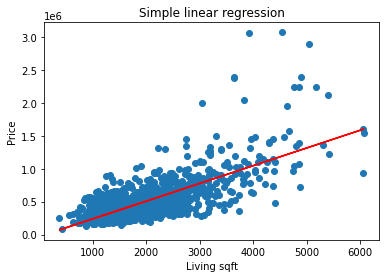

In [ ]:
#b)

#Your code:

#Here I made predictions of price
predictions = model.predict(X)


print(model.score(X,y))

#y = t1 * x + t0 
t1 = model.coef_[0]
t0 = model.intercept_


#I made simple linear regression which shows little accurate prediction house's price
plt.scatter(X, y)
plt.plot(X,predictions,color='red')
plt.xlabel('Living sqft')
plt.ylabel('Price')
plt.title('Simple linear regression')
plt.show()


#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

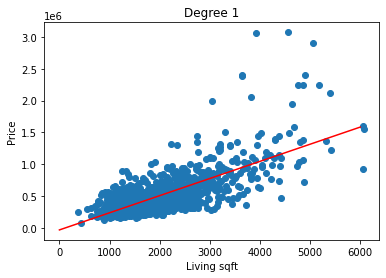

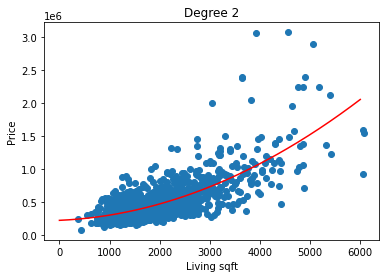

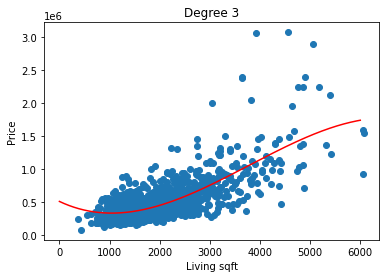

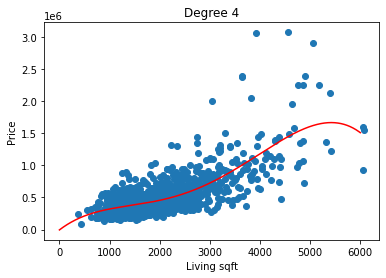

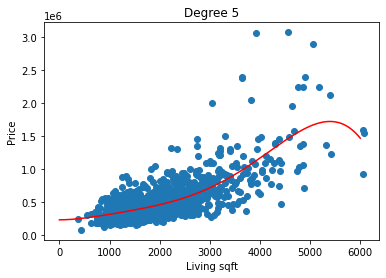

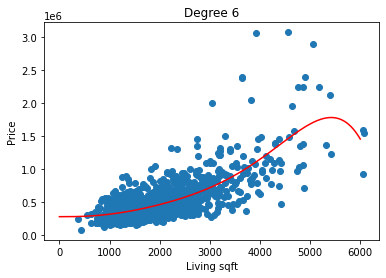

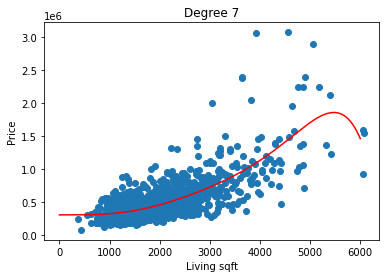

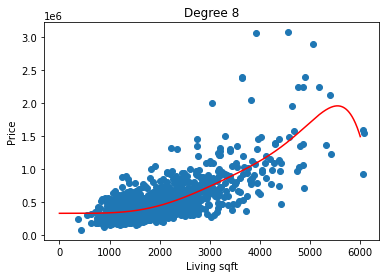

In [ ]:
#c)

poly_error = []

# Here, I made polynomial regression model for different degrees what is useful when correlations between
# variables aren't linear.
# Price predictions might be more accurate with this kind of regression.
# The higher degree of polynomial I have, the more fitting I get to the data on plot.

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False) # I created poly instace for each degrees
    X_order = poly.fit_transform(X) # Then, I created new features using poly instance.
    lr = LinearRegression() 
    #Your code:
      
    model = lr.fit(X_order,y) # Creating model for this dataset
    

    x_predict = np.linspace(0, 6000, 1000)
    y_predict = model.predict(poly.transform(x_predict.reshape(-1,1)))

    poly_error.append(mean_squared_error(y,model.predict(X_order)))
    
    plt.scatter(X, y)
    plt.plot(x_predict,y_predict, color='red')

    plt.xlabel('Living sqft')
    plt.ylabel('Price')
    title = 'Degree ' + str(order)
    plt.title(title)


    plt.show()



Text(0, 0.5, 'Error')

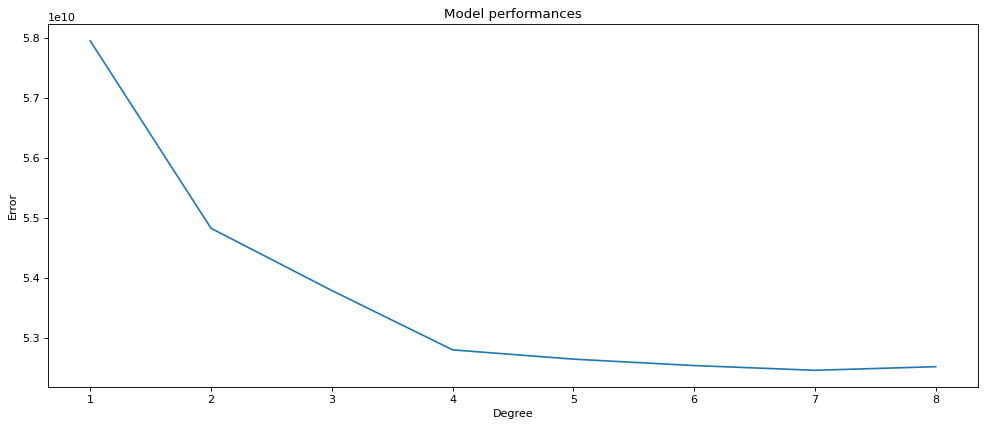

In [ ]:
# Below, I made plot which ilustrate error of models depends on the degree of polynomial.
# The higher degree is, the smaller error is.
# It means that the higher degree I choose, the better predictions of price I will get. 

#Your code:
figure(figsize=(15, 6), dpi=80)

degree = [1,2,3,4,5,6,7,8]
plt.plot(degree,poly_error)
plt.title('Model performances')
plt.xlabel('Degree')
plt.ylabel('Error')

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

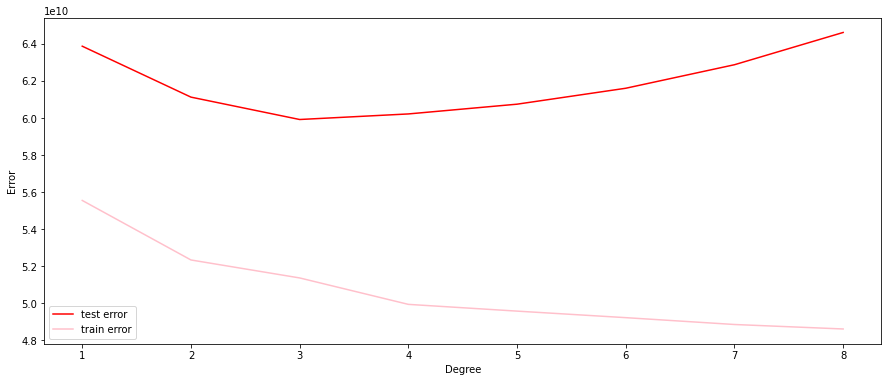

In [ ]:
error_train = [] 
error_test = []

for order in range(1,9): 

  poly = PolynomialFeatures(order, include_bias = False) 
  X_order = poly.fit_transform(X) 

  X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44) 

  lr = LinearRegression()
  model = lr.fit(X_train,y_train)

  y_pred1 = model.predict(X_train)
  error_train.append(mean_squared_error(y_pred1,y_train)) # Error for train set

  y_pred2 = model.predict(X_test)
  error_test.append(mean_squared_error(y_pred2,y_test)) # Error for test set

degree = [1,2,3,4,5,6,7,8]
plt.figure(figsize=(15, 6)) 
plt.plot(degree ,error_test, color="red", label='test error') 
plt.plot(degree ,error_train, color="pink", label='train error') 
plt.legend()
plt.xlabel('Degree') 
plt.ylabel('Error') 
plt.show()

# I created plot which compare test error and train error for models above.
# I can see that train test is much less than test error and test error is the smallest for polynomial of 3 degree.
# According to this plot in reality the above model is the best (has the smallest error when encounter data which hasn't seen before) 
# when polynomial degree is equal 3. 

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

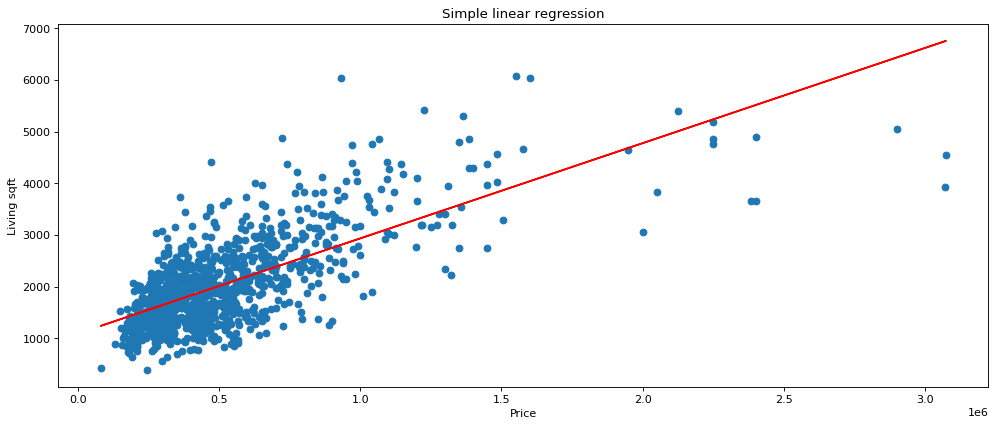

In [ ]:
#a)

y_price = house_df.price.values.reshape(-1,1)[:1000]
x_sqft_living = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:

model = LinearRegression().fit(y_price,x_sqft_living)
figure(figsize=(15, 6), dpi=80)

#Your code:
predictions = model.predict(y_price)

#y = t1 * x + t0 
t1 = model.coef_[0]
t0 = model.intercept_


plt.scatter(y_price,x_sqft_living )
plt.plot(y_price,predictions,color='red')
plt.xlabel('Price')
plt.ylabel('Living sqft')
plt.title('Simple linear regression')
plt.show()

# Below, I ploted graph from which I can predict living sqft based on price with small accuracy (beacuse it's just straight line). 

In [ ]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:

# First attemption - I changed degree of polynomial from 3 to 2.

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(2, include_bias = False) #I tried to change degree but I was pointless
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("#1 Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

#Second atttemption - I added zicode column to dataset.

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'zipcode']].values.reshape(-1,5)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("#2 Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

#Third attemption - I added zipcode and condition column to dataset.

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'zipcode', 'condition']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("#3 Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

# The smallest error I recived in third attemption when I added 2 columns to dataset.
# I might means that zipcode and condition have more significantly impact on houses' price than only columns picked before.


# Last attemption - I added column lat, long and zipcode
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view','lat','long','zipcode']].values.reshape(-1,7)
y = house_df.price.values.reshape(-1)



poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("#4 Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

Mean squared error equals: 48749267368.97092
#1 Mean squared error equals: 50345539048.14981
#2 Mean squared error equals: 48053351531.53778
#3 Mean squared error equals: 45995666646.6482
#4 Mean squared error equals: 31648536977.57367
